<a href="https://colab.research.google.com/github/lucabem/CompeticionMineria/blob/main/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocesamiento de las imagenes

## Descarga de las imagenes desde Github


In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib

In [4]:
dataset_url = 'https://github.com/lucabem/CompeticionMineria/blob/main/data/dataset_images.zip?raw=true'
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='train_data', 
                                   extract=True)

81059840/81057027 [==============================] - 1s 0us/step


In [5]:
!rm -rf /root/.keras/datasets/train_data.tar.gz /root/.keras/datasets/train_data
!ls -l /root/.keras/datasets/

total 72
drwxr-xr-x 28 root root  4096 Feb 11 10:19 ImagesTrain
drwxr-xr-x  2 root root 69632 Feb 11 10:19 Test


In [7]:
for direct in train_path.iterdir():
  if direct.is_dir():
    direct.rename(train_path / direct.name.split(sep='_100')[0])

In [8]:
train_path = pathlib.Path('/root/.keras/datasets/ImagesTrain')
image_count = len(list(train_path.glob('*/*.jpg')))
print(image_count)

2600


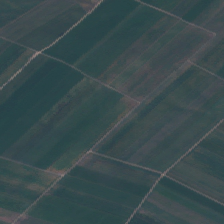

In [18]:
broadleaf_cropland = list(train_path.glob('Broadleaf_Cropland/*'))
PIL.Image.open(str(broadleaf_cropland[1]))

## Creacción de conjuntos de datos para entrenamiento y validacion

In [10]:
batch_size = 32
img_height = 180
img_width = 180

In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="training",
  seed=2021,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2600 files belonging to 26 classes.
Using 2080 files for training.


In [12]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="validation",
  seed=2021,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2600 files belonging to 26 classes.
Using 520 files for validation.


In [15]:
class_names = train_ds.class_names
print(class_names)

['Broadleaf_Cropland', 'Cereal_Cropland', 'Close_Shrubland', 'Continental_Water', 'Cropland__with_seasonal_water', 'Forest_CDB', 'Forest_CDN', 'Forest_CEB', 'Forest_CEN', 'Forest_DDB', 'Forest_DDN', 'Forest_DEB', 'Forest_DEN', 'Forest_ODB', 'Forest_ODN', 'Forest_OEB', 'Forest_OEN', 'Grassland', 'Mangrove', 'Marine_Water', 'Marshland_add', 'Moss_and_Lichen', 'Open_Shrubland', 'Snow', 'Swamp', 'Urban']


## Visualiza Datos

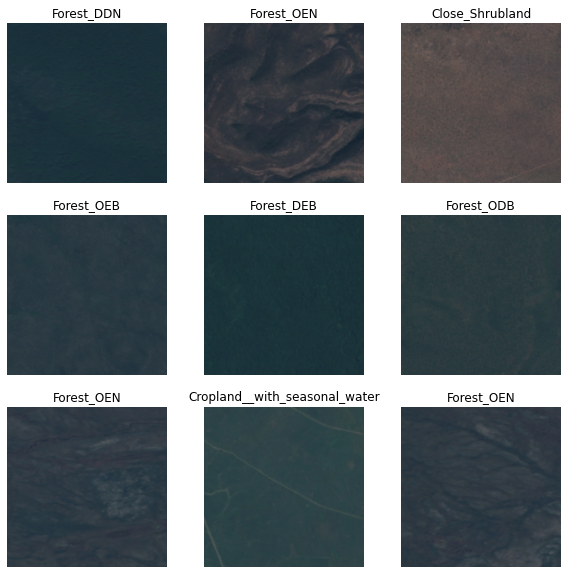

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Data Augmentation